This part also detects other objects like ball, goalkeeper and refree, because of changing data.yaml file to this:


```
names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/4
  version: 4
  workspace: roboflow-jvuqo
test: ../test/images
train: ../train/images
val: ../valid/images
```



# Train YOLOv8 on football players detection

In this notebook, we train [YOLOv8](https://github.com/ultralytics/ultralytics) on the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) from Roboflow.

The dataset contains 255 images of football games. The players, referees, goalkeeper and ball are labeled.


Setup environment

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 22.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from pathlib import Path
from roboflow import Roboflow
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Download Dataset

In [4]:
Path("datasets").mkdir(exist_ok=True)
%cd datasets
rf = Roboflow(api_key="UxApJs5oZUkmngdc3qdV")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov8")
%cd ..

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-4 in yolov8:: 100%|██████████| 522/522 [00:00<00:00, 2929.59it/s]


/content


In [5]:
path_dataset = Path("datasets/football-players-detection-4")
path_yaml = path_dataset/ "data.yaml"

In [6]:
len_train = len(list((path_dataset/ "train/images").iterdir()))
len_val = len(list((path_dataset/ "valid/images").iterdir()))
len_test = len(list((path_dataset/ "test/images").iterdir()))
print(f"Number of examples: train-{len_train}, val-{len_val}, test-{len_test}")

Number of examples: train-204, val-38, test-13


## Train YOLOv8

For the training we opted for yolov8l and image size 640

In [7]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 47.8MB/s]


In [8]:
path_yaml = '/content/datasets/football-players-detection-4/data.yaml'
model.train(data=str(path_yaml), epochs=300, imgsz=640, device=0, batch=16)

Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/football-players-detection-4/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.0MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/football-players-detection-4/train/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1667.15it/s]

train: New cache created: /content/datasets/football-players-detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/football-players-detection-4/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 671.69it/s]


val: New cache created: /content/datasets/football-players-detection-4/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300       6.9G      1.396       2.56     0.8888        587        640: 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         38        905       0.19      0.371      0.259       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      6.92G      1.209     0.9493     0.8233        539        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         38        905       0.52      0.273      0.289      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      6.75G      1.189     0.8192     0.8132        472        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         38        905      0.388      0.453      0.162     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      6.88G      1.197     0.7932     0.8201        499        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         38        905      0.302      0.533      0.306      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      6.72G      1.198     0.7376     0.8197        496        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38        905      0.704      0.395      0.393      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      6.78G      1.214      0.719     0.8094        602        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


                   all         38        905        0.7      0.508      0.471      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      6.91G      1.161     0.6555     0.8115        316        640: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


                   all         38        905      0.822      0.527      0.589       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      6.68G      1.157     0.6322     0.8099        458        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


                   all         38        905      0.763      0.591      0.634      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      6.91G      1.242     0.6447     0.8168        426        640: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         38        905      0.826      0.534      0.611      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      6.76G      1.148     0.6166     0.8164        517        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


                   all         38        905      0.769      0.597      0.652       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      6.73G       1.11     0.6068     0.8071        399        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         38        905      0.591      0.573      0.589      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      6.77G        1.1      0.621     0.8101        311        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         38        905      0.848      0.549      0.635      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      6.91G      1.104     0.5756     0.8028        447        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         38        905      0.712      0.603      0.666      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      6.74G      1.152     0.5883     0.8023        422        640: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         38        905      0.728      0.631      0.698       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      6.76G      1.116      0.586     0.8077        457        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         38        905      0.759       0.69      0.729       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      6.79G      1.168     0.6123     0.8043        490        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         38        905      0.733      0.647      0.722      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      6.79G      1.125     0.5747     0.8072        473        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         38        905       0.88      0.647       0.72      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      6.75G      1.239     0.6559     0.8129        547        640: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         38        905      0.802      0.624      0.702       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      6.74G      1.198     0.6053     0.8115        400        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         38        905      0.775      0.637      0.656      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      6.71G      1.131     0.5741     0.8083        362        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         38        905      0.825      0.715      0.766        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      6.83G       1.09     0.5553     0.8041        520        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905      0.857      0.681      0.765      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      6.73G      1.043     0.5343     0.8001        438        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         38        905      0.817      0.679       0.75       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      6.72G      1.046     0.5213     0.7949        543        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.846      0.648       0.74      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      6.77G       1.04     0.5252     0.7992        590        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         38        905      0.853      0.704       0.76      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300       6.9G      1.033     0.5134     0.8007        525        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38        905      0.862      0.694      0.773      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      6.74G      1.056     0.5067     0.7991        468        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         38        905      0.881      0.686       0.77      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       6.7G      1.099     0.5255      0.799        511        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        905      0.892      0.687      0.758      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      6.79G      1.032     0.5175     0.7963        389        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         38        905      0.865      0.669      0.749      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      6.82G      1.058     0.5031     0.7997        566        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         38        905      0.866      0.643      0.752       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      6.71G       1.08     0.5065     0.7936        483        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         38        905      0.948      0.659      0.789      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      6.73G      1.057     0.5107        0.8        473        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         38        905      0.894      0.683      0.764      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      6.78G       1.04     0.5153     0.7981        511        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


                   all         38        905      0.878      0.668       0.77      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      6.87G      1.011     0.5047     0.7951        665        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.851      0.665      0.771      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      6.73G     0.9669     0.4744     0.7936        493        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         38        905      0.852      0.672      0.779       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      6.74G      1.037     0.4983     0.7941        552        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         38        905      0.873      0.726      0.791      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      6.76G     0.9873     0.4836     0.7967        528        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.933      0.715      0.801      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      6.76G     0.9725     0.4742     0.7919        562        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38        905      0.857      0.739      0.795      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      6.68G     0.9824     0.4768     0.7941        609        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         38        905      0.921      0.684       0.78      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      6.77G     0.9506     0.4758     0.7924        406        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         38        905      0.851      0.641      0.759      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      6.73G     0.9354     0.4609     0.7942        545        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         38        905      0.933      0.736      0.784      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      6.85G     0.9837     0.4725     0.7944        443        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         38        905      0.871      0.709      0.759      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      6.75G     0.9687     0.4709     0.7945        445        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905      0.885      0.722      0.783      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      6.76G      0.955     0.4643     0.7923        491        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         38        905      0.848      0.718      0.777      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      6.69G     0.9436     0.4614     0.7889        604        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         38        905      0.863      0.637      0.725      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      6.86G      1.022     0.4809     0.7955        426        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38        905       0.86       0.68      0.743      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      6.73G      0.984     0.4715      0.795        642        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.918      0.711      0.786      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      6.77G      0.935     0.4595     0.7951        462        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         38        905      0.883      0.679      0.767      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      6.77G     0.9679     0.4599     0.7907        516        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.832      0.738      0.773      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      6.91G     0.9151     0.4494     0.7915        525        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         38        905       0.87      0.704      0.765      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      6.82G     0.9536     0.4595      0.795        426        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         38        905      0.904      0.743      0.804      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      6.78G     0.9604     0.4634     0.7908        385        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         38        905      0.895      0.762      0.796      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      6.69G     0.9293     0.4579     0.7946        564        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         38        905      0.846      0.722       0.79      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      6.78G     0.9604     0.4665      0.792        540        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         38        905      0.887      0.721      0.796       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      6.77G     0.9718     0.4709     0.7931        477        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         38        905      0.901      0.715      0.788      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      6.74G     0.9489     0.4734     0.7945        404        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         38        905      0.909      0.674      0.794      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300       6.7G     0.9754     0.4705     0.7982        548        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         38        905      0.757      0.692       0.75      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300       6.9G     0.9075     0.4471     0.7992        523        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         38        905      0.934      0.678      0.786      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      6.69G     0.9695     0.4644     0.7885        548        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         38        905      0.872      0.631      0.744      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      6.76G     0.9973     0.4838      0.794        353        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.868      0.678       0.75      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      6.73G      1.021     0.4877     0.7954        426        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         38        905      0.906      0.704      0.772      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      6.83G     0.9204     0.4494     0.7884        508        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        905      0.907      0.715       0.78      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      6.68G     0.9146     0.4465     0.7922        424        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         38        905      0.884      0.707      0.786      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      6.74G     0.9413     0.4488     0.7931        395        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        905       0.83      0.728      0.787      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      6.74G     0.8938     0.4392     0.7935        410        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         38        905       0.87      0.737      0.786      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300       6.9G     0.8914      0.439     0.7941        391        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         38        905      0.899      0.686       0.77      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      6.74G       0.93     0.4557     0.7907        578        640: 100%|██████████| 13/13 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         38        905      0.876      0.711       0.78       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      6.76G     0.9293     0.4501     0.7903        391        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         38        905      0.879      0.724      0.776      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      6.72G     0.8866     0.4295     0.7876        489        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         38        905      0.925      0.744      0.791      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      6.81G     0.9105     0.4395     0.7879        599        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         38        905      0.905      0.727      0.792      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      6.73G     0.8821     0.4291     0.7877        561        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         38        905      0.897       0.73      0.789      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      6.76G     0.9171      0.437     0.7882        415        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         38        905      0.916      0.728      0.803      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      6.62G     0.8798     0.4295     0.7896        487        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         38        905      0.917      0.746      0.806       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300       6.9G     0.8736     0.4175     0.7882        411        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         38        905      0.885      0.754      0.814      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300       6.7G     0.8891      0.428     0.7882        660        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         38        905      0.884      0.727      0.832      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      6.77G     0.8722     0.4251     0.7945        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         38        905      0.909      0.739      0.817      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      6.67G      0.868      0.423     0.7867        448        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         38        905      0.927      0.733      0.803       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      6.88G     0.8788     0.4151     0.7864        548        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         38        905      0.912      0.717      0.795      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      6.77G     0.8847     0.4287     0.7871        449        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         38        905      0.883      0.712      0.796      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      6.77G     0.8656      0.421     0.7877        561        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         38        905      0.911      0.676      0.781      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      6.69G     0.8575     0.4141     0.7853        503        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         38        905      0.926      0.711      0.806      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      6.83G     0.8821     0.4185     0.7881        552        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         38        905      0.899      0.715      0.785       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      6.75G     0.8594     0.4148     0.7847        411        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         38        905      0.843      0.673      0.752      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      6.76G     0.8878     0.4127     0.7871        491        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         38        905      0.875      0.732      0.785      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      6.74G     0.8775     0.4157     0.7877        419        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905      0.865      0.704      0.779      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      6.92G     0.9016     0.4256     0.7859        308        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         38        905      0.906      0.721      0.793      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      6.75G     0.9135     0.4239      0.791        699        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        905      0.892      0.757      0.797      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      6.71G     0.9025      0.426     0.7886        366        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.895      0.768      0.804       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      6.88G     0.9203     0.4299      0.788        437        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         38        905      0.905      0.742      0.806      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      6.75G     0.9225      0.437     0.7901        591        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         38        905      0.923      0.756      0.813       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      6.77G     0.9147     0.4321     0.7913        524        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         38        905      0.895      0.771      0.809      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      6.78G     0.8696     0.4137     0.7897        377        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         38        905      0.934      0.715      0.792      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300       6.7G     0.8686     0.4045     0.7845        530        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         38        905      0.889       0.75      0.813       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      6.88G     0.9004     0.4112     0.7851        500        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         38        905      0.899      0.738      0.816      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      6.76G      0.892     0.4149     0.7857        450        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         38        905      0.915      0.725      0.804      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      6.73G     0.8702     0.4069     0.7845        640        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         38        905      0.954      0.724      0.807      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300       6.7G     0.8171     0.3873     0.7886        575        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.925      0.761      0.807      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      6.67G     0.8666     0.4039     0.7891        440        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         38        905      0.843      0.737      0.793      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300       6.7G     0.8473     0.3974     0.7865        482        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.889      0.771      0.815      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      6.71G      0.855     0.3992     0.7872        433        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         38        905      0.897      0.735      0.788      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      6.77G     0.8858     0.4158     0.7865        425        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         38        905      0.914      0.722       0.77      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      6.87G     0.8302     0.3973     0.7852        362        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.922      0.737      0.787      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      6.75G     0.8275     0.3972     0.7868        467        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         38        905      0.925      0.725      0.789      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      6.78G     0.8521     0.3992     0.7837        348        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.896      0.734      0.791       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300       6.7G     0.8249     0.3858     0.7829        546        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         38        905      0.838      0.737      0.783      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      6.89G     0.8317     0.3975     0.7835        443        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.853      0.702      0.776      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      6.63G     0.8189     0.3977     0.7833        530        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         38        905      0.922      0.717      0.777      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      6.76G     0.8042     0.3844     0.7839        540        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         38        905      0.894      0.767        0.8      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      6.72G     0.8274     0.3905     0.7836        443        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         38        905      0.901      0.756      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      6.78G     0.8574     0.4044     0.7847        567        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        905      0.906      0.758      0.797      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      6.79G     0.8041     0.3858     0.7815        618        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         38        905      0.873      0.745      0.787      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      6.75G       0.79     0.3805     0.7856        406        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         38        905      0.898      0.769      0.797      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      6.67G     0.8263     0.3925     0.7858        520        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         38        905      0.911      0.729      0.797      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      6.91G     0.8699     0.4145     0.7843        506        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         38        905      0.908      0.738      0.803      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      6.74G      0.858     0.4157     0.7872        420        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         38        905      0.892      0.749      0.817      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      6.75G     0.8434     0.4064     0.7832        625        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.892       0.76      0.815      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      6.74G     0.8321     0.3982      0.786        560        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         38        905      0.939       0.74      0.807       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      6.88G     0.8441     0.4068     0.7837        571        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.924      0.753      0.802      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      6.73G     0.8013     0.3956     0.7852        486        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         38        905      0.862      0.716      0.776      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      6.67G      0.823      0.402     0.7852        462        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         38        905      0.923       0.78      0.817       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      6.77G     0.8392     0.4229     0.7819        438        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.956      0.714      0.811      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      6.78G     0.8278     0.4093     0.7868        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         38        905      0.895      0.738      0.822      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      6.75G     0.8599     0.4155     0.7827        492        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        905      0.866      0.752      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      6.74G     0.8702     0.4178     0.7833        389        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         38        905      0.861      0.764      0.797      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      6.73G     0.8725     0.4131     0.7873        520        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        905      0.954      0.675       0.79      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      6.92G     0.8218     0.3927     0.7823        592        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         38        905      0.903      0.657      0.775      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      6.76G     0.8258     0.3947     0.7821        344        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.906      0.656      0.762      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      6.76G     0.8363     0.3919     0.7865        421        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         38        905      0.882      0.701       0.79      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      6.79G      0.802     0.3774     0.7808        564        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         38        905       0.83      0.749      0.803      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      6.82G     0.7868     0.3761     0.7808        385        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         38        905       0.86      0.751      0.806      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      6.75G     0.8172     0.3888     0.7817        509        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         38        905      0.865      0.724      0.814      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      6.74G      0.772     0.3694     0.7835        443        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


                   all         38        905      0.862       0.72       0.81      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      6.74G     0.8173     0.3789     0.7822        599        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905      0.874      0.754      0.807      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      6.66G     0.7911     0.3741     0.7808        437        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         38        905      0.948      0.736      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      6.69G     0.7764     0.3739     0.7842        580        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.919      0.734       0.83       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      6.77G     0.8053     0.3836     0.7799        464        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.931      0.763      0.823      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      6.74G     0.8472     0.3964     0.7818        573        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         38        905      0.893      0.749      0.815      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300       6.9G     0.8212     0.3855     0.7808        356        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38        905      0.872      0.733      0.818      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      6.66G     0.8082     0.3849     0.7824        480        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.874      0.729      0.804      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      6.75G     0.8181     0.3824     0.7843        601        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         38        905      0.919      0.694      0.812      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      6.77G     0.7853     0.3717     0.7859        390        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38        905       0.92      0.711      0.812      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      6.86G     0.8125     0.3814     0.7824        524        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all         38        905      0.902      0.749      0.813      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      6.77G     0.7725     0.3646     0.7804        654        640: 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         38        905      0.948      0.723      0.814       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      6.69G     0.7517     0.3624     0.7787        500        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         38        905      0.909      0.723      0.801      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      6.73G     0.8235     0.3789     0.7829        562        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.934      0.742      0.823      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300       6.9G     0.7975     0.3807     0.7786        541        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         38        905      0.877      0.755      0.815      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      6.72G     0.8141     0.3832     0.7799        477        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         38        905      0.922      0.734      0.814      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      6.72G     0.7823     0.3836     0.7754        371        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         38        905      0.871      0.709      0.787      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300       6.7G     0.7755     0.3813     0.7824        438        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         38        905      0.908      0.684      0.775      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      6.81G     0.7853     0.3779     0.7844        504        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         38        905      0.892      0.709      0.799      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      6.77G     0.7899     0.3747     0.7821        508        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        905      0.927      0.723      0.816      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      6.75G     0.7811     0.3723     0.7853        387        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38        905      0.856       0.74      0.805      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      6.75G      0.756     0.3614     0.7797        381        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         38        905        0.9      0.718      0.802      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      6.87G     0.7425      0.358     0.7789        397        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         38        905       0.88      0.729      0.805      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      6.75G     0.7575     0.3613      0.778        443        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.867      0.734        0.8      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      6.73G     0.7864     0.3718     0.7788        606        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         38        905      0.893      0.735      0.802       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      6.74G     0.7969     0.3721     0.7802        603        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         38        905       0.89      0.697      0.782      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      6.87G     0.8018     0.3738     0.7819        467        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         38        905      0.884       0.73      0.805      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      6.73G     0.7725     0.3668     0.7814        656        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         38        905      0.915      0.758      0.818      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      6.77G     0.7914     0.3751     0.7819        436        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.884      0.753      0.808      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      6.66G      0.766     0.3641     0.7772        465        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         38        905      0.927       0.74      0.816      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      6.91G     0.7986     0.3664     0.7809        418        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.896       0.75      0.825      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      6.75G     0.8468     0.3792     0.7854        561        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         38        905      0.893       0.76        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      6.65G     0.7995     0.3747     0.7794        556        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.895      0.751      0.796      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      6.71G     0.7405     0.3538     0.7821        463        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.895      0.729      0.807      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      6.87G     0.7293     0.3466      0.781        401        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         38        905      0.893      0.752      0.808      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      6.79G      0.759     0.3564     0.7813        349        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.923      0.747      0.805      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      6.76G     0.7613     0.3559     0.7777        471        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         38        905      0.912      0.761      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      6.75G     0.7616      0.356     0.7811        565        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         38        905      0.932      0.755      0.824      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      6.69G      0.717      0.344     0.7837        540        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         38        905      0.899      0.759      0.816      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      6.74G     0.7491     0.3482     0.7788        541        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         38        905      0.918      0.756      0.824      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      6.71G     0.7329     0.3516     0.7817        353        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         38        905      0.943      0.753      0.815      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      6.73G     0.7616     0.3535     0.7786        563        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         38        905      0.965      0.742      0.811      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      6.91G     0.7423     0.3496      0.776        509        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         38        905      0.984      0.738      0.812      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      6.72G     0.7486     0.3482     0.7809        588        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.937       0.76      0.822      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      6.74G     0.7256     0.3412     0.7788        572        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.945      0.753      0.822      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      6.75G     0.7087     0.3405      0.775        454        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         38        905      0.964       0.76      0.828      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      6.89G     0.7225     0.3388      0.781        443        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         38        905      0.967      0.752      0.813      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      6.74G     0.7167      0.334     0.7781        710        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         38        905      0.955       0.75      0.809      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      6.74G     0.7514     0.3553     0.7804        621        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         38        905      0.943      0.753      0.814      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      6.75G     0.7129     0.3437     0.7803        380        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         38        905      0.942      0.762      0.822      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      6.83G       0.75     0.3537     0.7785        429        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.947       0.76       0.82      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      6.77G      0.736     0.3469     0.7816        712        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         38        905      0.941       0.76       0.83      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      6.75G     0.7486     0.3518     0.7795        641        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         38        905      0.926      0.764      0.835      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      6.74G     0.7216     0.3467     0.7773        500        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         38        905      0.942       0.76      0.833      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      6.85G     0.7432     0.3478     0.7785        415        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         38        905      0.954      0.762      0.843      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      6.76G     0.7604     0.3528     0.7787        391        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        905      0.952      0.762      0.839      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      6.75G     0.7448      0.341     0.7775        483        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         38        905      0.916      0.742      0.827      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      6.72G     0.7643     0.3488     0.7786        506        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         38        905      0.912      0.756      0.826      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300       6.9G     0.7268     0.3382      0.778        507        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


                   all         38        905      0.943      0.743      0.829      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      6.77G     0.7366     0.3445     0.7797        414        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]


                   all         38        905      0.911      0.749      0.831      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      6.68G     0.7243     0.3383     0.7788        483        640: 100%|██████████| 13/13 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         38        905      0.935      0.735      0.824      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      6.68G     0.6935     0.3261     0.7798        394        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         38        905      0.947      0.744      0.836      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      6.91G     0.7063     0.3292      0.779        529        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.953      0.762      0.849      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300       6.7G     0.7127     0.3332     0.7782        481        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         38        905      0.944      0.765      0.856      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      6.74G     0.7185      0.335     0.7778        533        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         38        905      0.948       0.76       0.85      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300       6.7G     0.7035     0.3262     0.7764        684        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         38        905      0.946      0.757      0.841      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      6.88G     0.6921     0.3225     0.7751        352        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         38        905      0.947      0.731      0.838      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      6.74G     0.6872     0.3238     0.7742        448        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


                   all         38        905      0.954      0.708       0.81      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      6.72G     0.6985     0.3289     0.7791        554        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        905      0.906      0.729      0.818       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      6.71G     0.7123     0.3335       0.78        462        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         38        905      0.936      0.758      0.835      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      6.91G     0.7521     0.3498     0.7819        585        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         38        905      0.932      0.754      0.835       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      6.75G     0.7101     0.3357     0.7806        477        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         38        905      0.927      0.727      0.836      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      6.75G     0.6833     0.3281     0.7755        304        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         38        905      0.936      0.755      0.833       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300       6.7G     0.6813     0.3295      0.779        369        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         38        905      0.948      0.737       0.84      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300       6.9G     0.7109      0.339     0.7784        523        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         38        905      0.955       0.73      0.834      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      6.76G     0.7086       0.34     0.7747        388        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         38        905      0.928       0.75      0.838      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      6.72G     0.6697      0.329      0.779        366        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]


                   all         38        905      0.924      0.759      0.829      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      6.68G     0.7036      0.334     0.7782        462        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        905      0.899      0.756       0.83      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300       6.9G     0.6936     0.3275     0.7785        497        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         38        905       0.91      0.728       0.82      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      6.74G     0.7312     0.3482     0.7819        491        640: 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


                   all         38        905      0.975      0.693      0.803      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      6.73G     0.7218     0.3397     0.7764        671        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         38        905      0.935      0.718      0.805      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      6.75G     0.6728      0.321      0.775        512        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.933      0.743      0.832      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      6.91G     0.6754     0.3272     0.7771        426        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         38        905      0.929      0.743      0.823       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      6.76G     0.6838     0.3279     0.7771        517        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         38        905      0.934      0.744       0.82      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      6.76G     0.6739     0.3243     0.7745        379        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         38        905      0.922      0.737      0.813       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      6.64G      0.688     0.3279     0.7752        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         38        905      0.935      0.737      0.809      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300       6.9G     0.6666     0.3218     0.7747        497        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         38        905       0.96      0.712      0.806      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      6.74G     0.6812     0.3226     0.7769        512        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         38        905      0.963      0.712      0.807       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      6.73G     0.6918     0.3268     0.7766        574        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         38        905       0.94      0.738      0.806      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      6.77G     0.6875     0.3278     0.7745        489        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         38        905       0.96      0.744      0.809      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300       6.9G     0.6601     0.3182     0.7733        473        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         38        905      0.965      0.733      0.826      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      6.73G     0.6425     0.3135     0.7784        408        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38        905       0.94       0.76      0.838      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      6.67G     0.7064     0.3293      0.779        509        640: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38        905      0.948      0.764      0.833       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      6.73G     0.6975     0.3292     0.7755        549        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         38        905      0.905      0.765      0.825      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      6.84G     0.6555     0.3188     0.7751        485        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         38        905       0.93      0.775      0.828      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      6.73G     0.6405      0.309     0.7776        537        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         38        905      0.942      0.767      0.833      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      6.72G     0.6734     0.3172     0.7761        479        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         38        905      0.934      0.771      0.832      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      6.72G     0.6748     0.3205     0.7756        467        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         38        905      0.912      0.768      0.824      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      6.89G     0.6822     0.3236     0.7759        505        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905      0.935       0.76      0.825      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      6.74G     0.6608     0.3223     0.7775        439        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         38        905       0.95      0.757      0.832      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      6.72G     0.6914     0.3265      0.777        539        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.943      0.746      0.838      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      6.75G     0.7102     0.3276      0.776        444        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         38        905      0.934      0.755      0.834      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      6.87G     0.6982      0.324     0.7775        488        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         38        905      0.904       0.74      0.829      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      6.77G     0.6689     0.3144     0.7754        398        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         38        905      0.885       0.75      0.826      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      6.74G     0.6919      0.322     0.7776        409        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.901      0.749      0.828      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      6.72G     0.6298     0.3068     0.7753        633        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         38        905      0.932      0.754      0.834       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      6.82G     0.6423      0.308      0.775        411        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.907      0.756      0.835      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      6.78G     0.6686     0.3136     0.7721        424        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.912      0.752      0.827      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      6.71G     0.6451     0.3072     0.7726        449        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         38        905      0.933      0.743      0.827      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      6.75G     0.6784     0.3138     0.7752        626        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         38        905      0.941      0.746      0.838      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      6.89G     0.6317     0.3016     0.7721        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         38        905      0.944      0.753       0.83      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      6.75G     0.6471     0.3094     0.7761        446        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         38        905      0.954      0.746      0.831      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      6.76G     0.6535      0.308     0.7726        549        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         38        905      0.954      0.749      0.823      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      6.77G     0.6373     0.3055     0.7789        448        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905      0.952      0.758       0.83       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      6.92G     0.6554     0.3058     0.7745        505        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         38        905      0.966       0.75      0.839      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      6.69G     0.6322     0.3068     0.7732        486        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         38        905      0.946      0.746      0.841      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300       6.7G     0.6399     0.3053     0.7759        456        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.941      0.738      0.836      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      6.75G     0.6655     0.3101     0.7718        464        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         38        905       0.95      0.754      0.826      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      6.84G     0.6368     0.3081     0.7716        625        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        905      0.946      0.757      0.831      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      6.65G     0.6262     0.2968     0.7744        516        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         38        905      0.934       0.76      0.836      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      6.74G      0.619     0.2969     0.7754        407        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         38        905      0.928      0.758      0.843      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      6.77G     0.6392      0.301     0.7732        479        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


                   all         38        905      0.925      0.766      0.828      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      6.65G      0.622      0.302     0.7732        577        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         38        905      0.955      0.737      0.826      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      6.73G     0.6016     0.2973     0.7734        601        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         38        905      0.938      0.755       0.83      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      6.71G      0.627     0.2981      0.778        585        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.959      0.737       0.83      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      6.64G      0.625      0.299     0.7741        447        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         38        905       0.94      0.742      0.836      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300       6.9G     0.6164     0.2956     0.7732        497        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905      0.945      0.751      0.839      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      6.76G     0.6301     0.2982      0.771        640        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         38        905      0.956      0.747      0.839      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      6.74G     0.6282     0.2993     0.7761        426        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]


                   all         38        905      0.957       0.76      0.841      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      6.76G     0.6115     0.2901     0.7768        347        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38        905       0.96      0.756      0.838      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      6.91G     0.5993     0.2906     0.7713        491        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         38        905      0.951      0.758       0.83      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      6.69G     0.5953     0.2867     0.7747        468        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         38        905      0.953      0.752      0.827      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      6.66G      0.623     0.2927     0.7727        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38        905      0.948      0.746      0.817       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      6.76G     0.6019     0.2904     0.7743        474        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         38        905      0.943      0.735      0.826      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      6.85G     0.6091     0.2925     0.7717        667        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         38        905      0.946      0.736      0.829      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      6.77G     0.6147     0.2938     0.7758        432        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.953      0.741      0.825      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      6.64G      0.597     0.2918      0.772        405        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         38        905      0.946      0.745      0.825      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300       6.7G     0.6127     0.2906      0.773        508        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905      0.939      0.757      0.839      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      6.82G     0.5873     0.2876     0.7721        547        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         38        905      0.932      0.757      0.836      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      6.76G     0.5974     0.2879     0.7686        474        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         38        905      0.934      0.751      0.834      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      6.71G     0.5967     0.2871     0.7739        456        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         38        905      0.946      0.733      0.831      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      6.78G     0.5988     0.2851     0.7696        475        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.949      0.723      0.827      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      6.84G     0.5892     0.2831     0.7696        513        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


                   all         38        905      0.944      0.738      0.826      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      6.86G     0.6162      0.293     0.7726        538        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         38        905      0.945      0.745      0.823      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      6.74G     0.6081     0.2881      0.775        428        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         38        905      0.968      0.726       0.82      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      6.68G     0.6076     0.2883     0.7739        356        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         38        905      0.958      0.743      0.828      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      6.85G     0.6218     0.2932     0.7704        510        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        905      0.959      0.751      0.831      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300       6.7G     0.6401     0.2969      0.772        595        640: 100%|██████████| 13/13 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         38        905      0.922      0.752      0.824      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      6.72G     0.6006     0.2866      0.772        516        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         38        905      0.918      0.749      0.824      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300       6.8G     0.6204     0.2916     0.7738        600        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.949      0.724      0.826      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      6.91G     0.5889     0.2828     0.7734        496        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         38        905      0.936      0.725      0.826      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      6.74G     0.5725     0.2764     0.7722        436        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        905      0.941       0.72      0.825      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300       6.7G     0.5805       0.28     0.7729        385        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         38        905      0.943      0.719      0.823      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      6.73G     0.5847     0.2808     0.7675        492        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         38        905      0.944      0.719      0.819      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      6.89G     0.5921     0.2833     0.7705        602        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         38        905      0.933       0.73      0.816      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      6.74G      0.542     0.2664     0.7691        545        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.946      0.738      0.829      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      6.76G     0.5581     0.2721     0.7759        355        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38        905      0.944      0.744      0.831      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      6.73G       0.59     0.2816     0.7693        409        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         38        905      0.941      0.744      0.833       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      6.89G     0.5845      0.284      0.772        473        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         38        905      0.944      0.742      0.825      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      6.74G     0.5837     0.2807     0.7717        469        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.948       0.74      0.826      0.588


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      6.93G     0.5536     0.2794     0.7752        269        640: 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


                   all         38        905      0.936       0.74      0.833      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      6.94G     0.5399     0.2703       0.77        280        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         38        905      0.928      0.748      0.827      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      6.83G     0.5266     0.2694     0.7715        278        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         38        905      0.922      0.745      0.819      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      6.92G     0.5232     0.2633     0.7736        284        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         38        905      0.929      0.745       0.81      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      6.93G     0.5187     0.2649     0.7698        270        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         38        905      0.937      0.748      0.818      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      6.94G     0.5298      0.269     0.7689        274        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         38        905      0.942      0.752      0.824      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      6.84G     0.5282     0.2679     0.7681        282        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.938      0.752      0.826      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      6.94G     0.5515     0.2748     0.7688        288        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         38        905      0.938      0.751      0.827      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      6.94G     0.5187     0.2667     0.7699        272        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         38        905      0.939      0.752       0.82      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      6.94G     0.5241     0.2645     0.7679        284        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         38        905      0.942      0.753      0.819       0.59



300 epochs completed in 0.784 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         38        905      0.945      0.739      0.827      0.598
                  ball         35         35      0.968      0.229      0.443       0.24
            goalkeeper         27         27      0.885      0.857      0.917      0.682
                player         38        754      0.958       0.96      0.983      0.787
               referee         38         89      0.968       0.91      0.963      0.683
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787537a49060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [9]:
model.val()

Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/datasets/football-players-detection-4/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]


                   all         38        905      0.945      0.739      0.827      0.596
                  ball         35         35      0.968      0.229      0.442      0.224
            goalkeeper         27         27      0.885      0.857      0.917      0.689
                player         38        754      0.959      0.962      0.984      0.794
               referee         38         89      0.968       0.91      0.963      0.677
Speed: 0.2ms preprocess, 18.5ms inference, 0.1ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78754379eef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Display prediction on test images

In [10]:
colors = {
    "ball": (0,200,200),
    "player": (255,0,0),
    "goalkeeper":(255,0,255),
    "referee": (0,0,255),
}

ind_to_cls = {
    0: "ball",
    1 : "goalkeeper",
    2 : "player",
    3 : "referee"
}

In [11]:
path_test_images = path_dataset/ "test/images"
test_image_paths = list(path_test_images.iterdir())
num_images = len(test_image_paths)

In [ ]:
image_idx = np.random.randint(0, num_images)
image = cv2.imread(str(test_image_paths[image_idx]))

In [ ]:
prediction = model(image)


0: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 25.2ms
Speed: 3.6ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


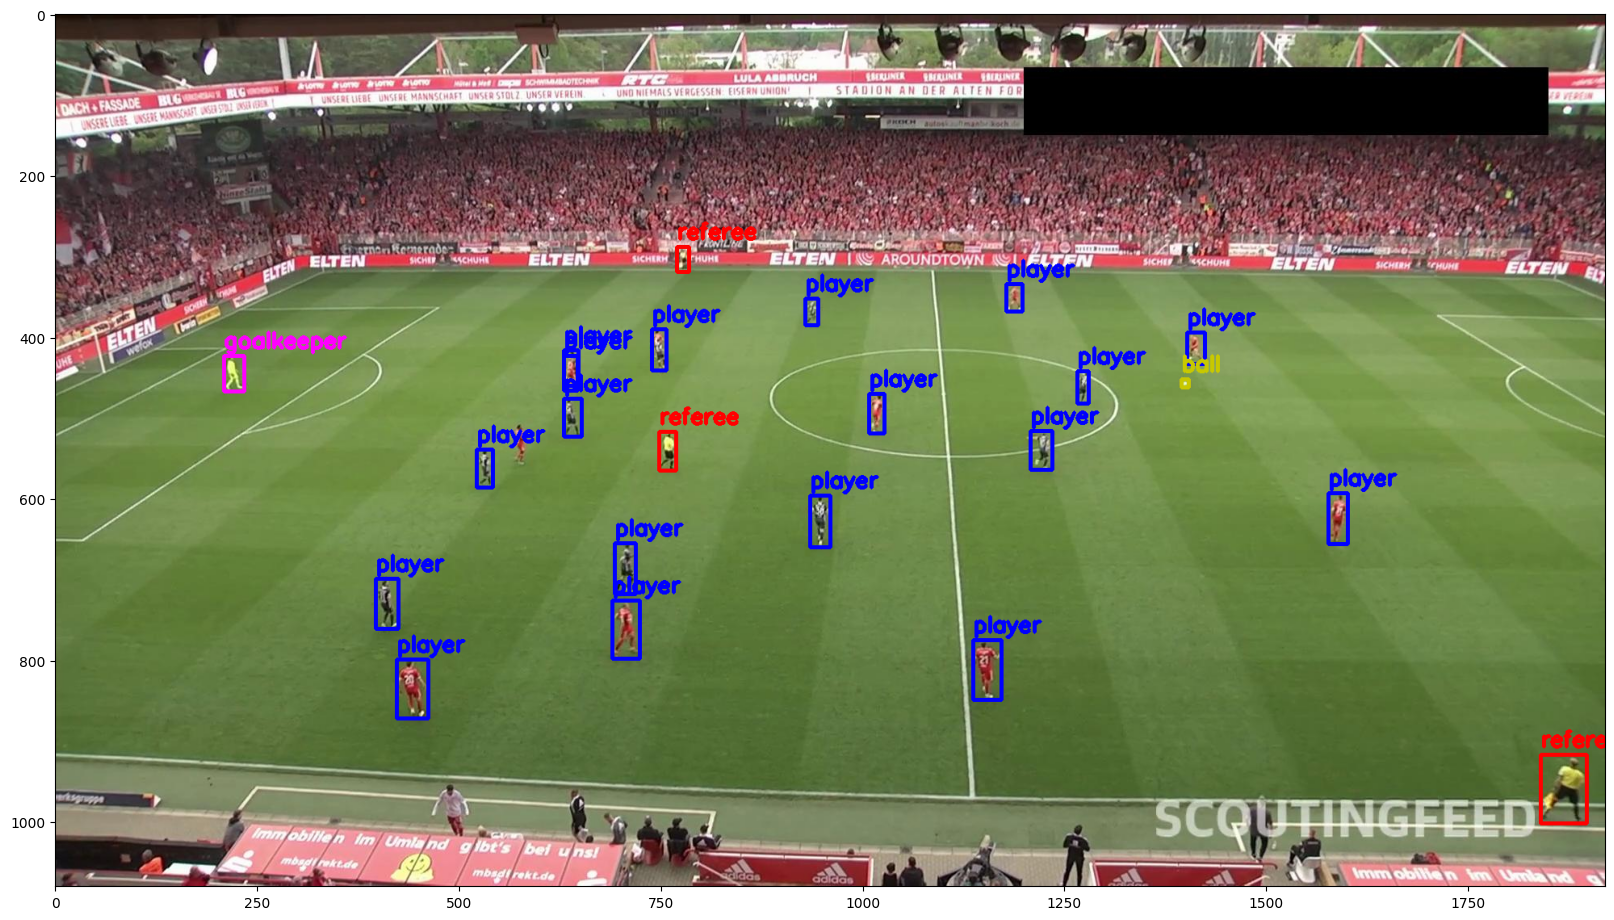

In [ ]:
plt.figure(figsize=(20, 20))
for pred in prediction[0]:
    bbox = pred.boxes.xyxy.int().tolist()[0]
    cls_ind = pred.boxes.cls.int().item()
    cls = ind_to_cls[cls_ind]
    cv2.rectangle(img=image, pt1=tuple(bbox[:2]), pt2=tuple(bbox[2:]), color=colors[cls], thickness=3)
    cv2.putText(image, cls, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cls], 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

In [14]:
image_idx = np.random.randint(0, num_images)
image = cv2.imread(str(test_image_paths[image_idx]))

In [15]:
prediction = model(image)


0: 384x640 1 goalkeeper, 20 players, 2 referees, 45.9ms
Speed: 3.4ms preprocess, 45.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


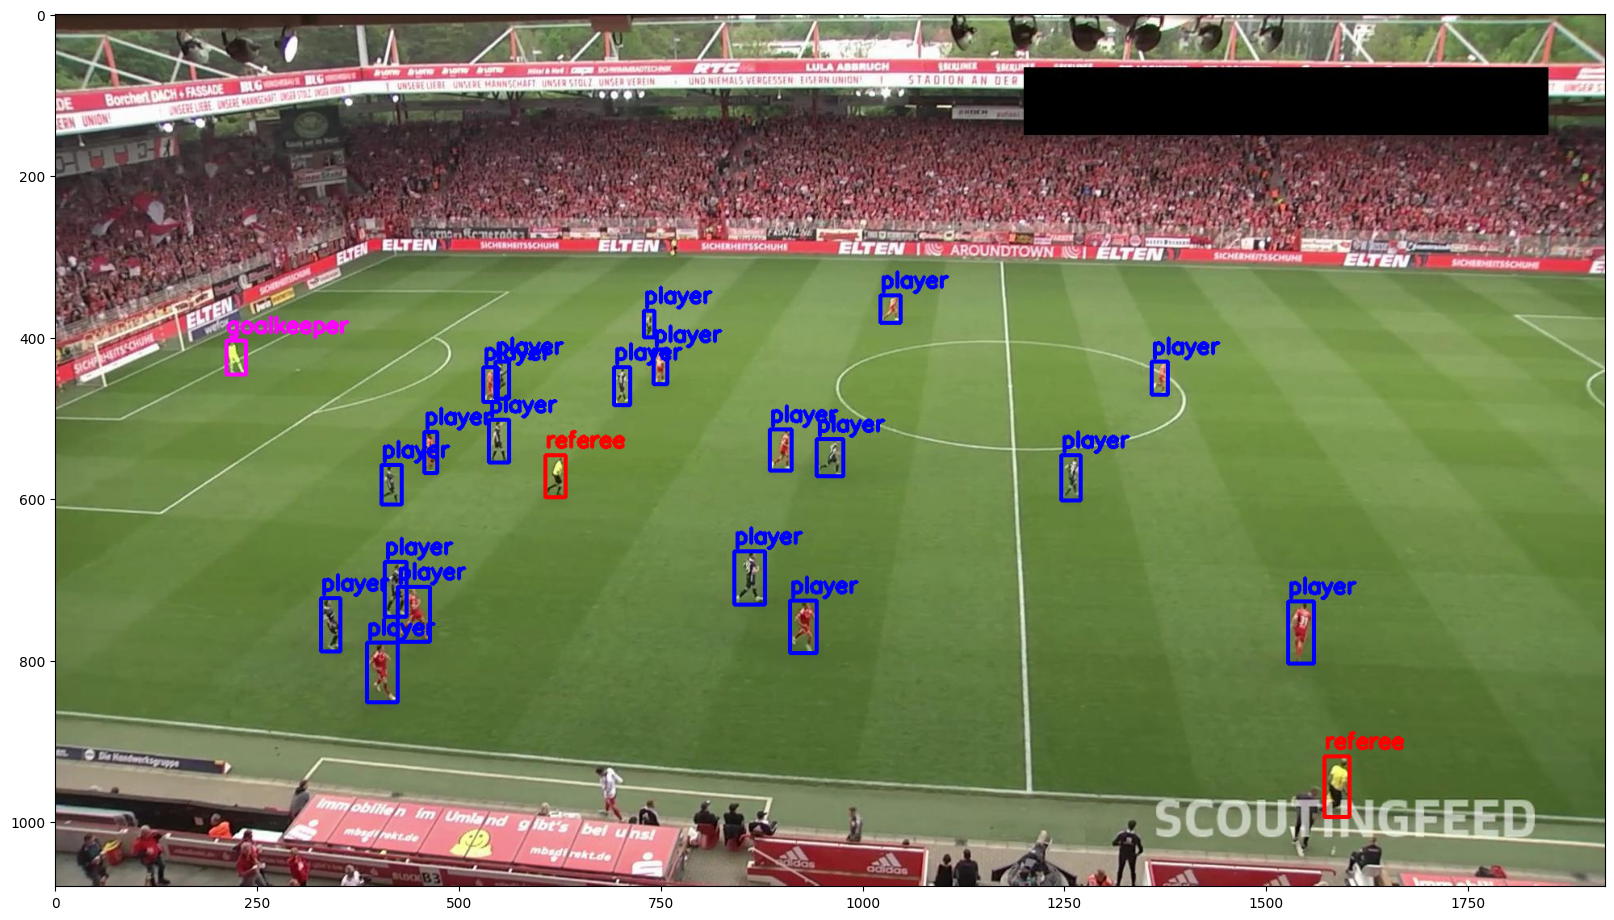

In [16]:
plt.figure(figsize=(20, 20))
for pred in prediction[0]:
    bbox = pred.boxes.xyxy.int().tolist()[0]
    cls_ind = pred.boxes.cls.int().item()
    cls = ind_to_cls[cls_ind]
    cv2.rectangle(img=image, pt1=tuple(bbox[:2]), pt2=tuple(bbox[2:]), color=colors[cls], thickness=3)
    cv2.putText(image, cls, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cls], 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

As you can see the algorithm correctly detects objects in the image.

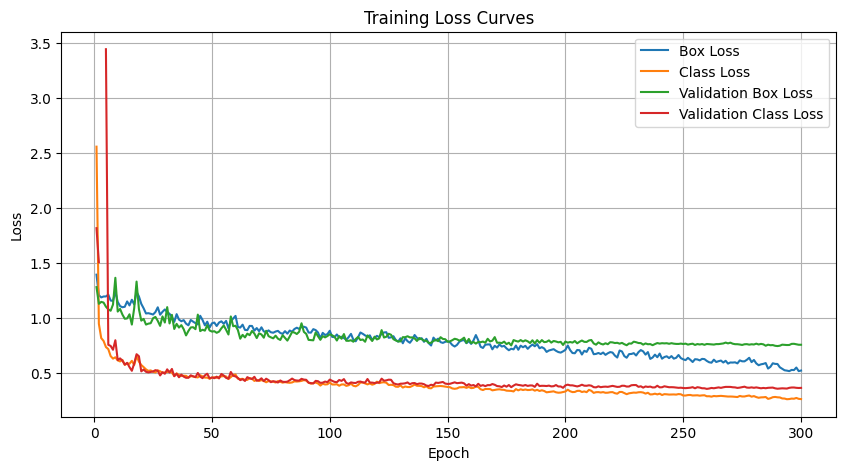

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load YOLO training logs
metrics_path = "runs/detect/train/results.csv"  # Ensure this path is correct
df = pd.read_csv(metrics_path)

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label="Box Loss")
plt.plot(df['epoch'], df['train/cls_loss'], label="Class Loss")
plt.plot(df['epoch'], df['val/box_loss'], label="Validation Box Loss")
plt.plot(df['epoch'], df['val/cls_loss'], label="Validation Class Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid()
plt.show()


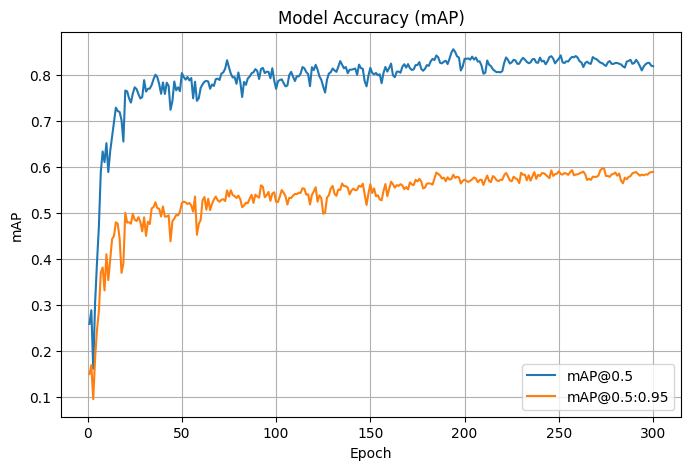

In [13]:
# Check correct column names from print(df.columns)
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df.get('metrics/mAP50(B)', df.get('mAP50', None)), label="mAP@0.5")
plt.plot(df['epoch'], df.get('metrics/mAP50-95(B)', df.get('mAP50-95', None)), label="mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Model Accuracy (mAP)")
plt.legend()
plt.grid()
plt.show()


In [17]:
import pandas as pd

# Load results.csv
metrics_path = "runs/detect/train/results.csv"
df = pd.read_csv(metrics_path)

# Print available columns
print("Available columns:", df.columns)

# Extract last epoch values
last_epoch = df.iloc[-1]  # Get last row

# Extract and convert metrics correctly
precision = float(last_epoch['metrics/precision(B)'])
recall = float(last_epoch['metrics/recall(B)'])
map50 = float(last_epoch['metrics/mAP50(B)'])
map50_95 = float(last_epoch['metrics/mAP50-95(B)'])

# Print formatted results
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map50:.3f}")
print(f"mAP@0.5:0.95: {map50_95:.3f}")


Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Precision: 0.942
Recall: 0.753
mAP@0.5: 0.819
mAP@0.5:0.95: 0.590


### Explanation of method

### The head

The head network applies convolutions to the each output of the neck layers. Its output is prediction of the bounding box coordinates, width and height, the probability and the object class.

### The loss 
The loss function is as follows:

$$
\begin{gathered}
loss = \lambda_1 L_{box} + \lambda_2 L_{cls} + \lambda_3 L_{dfl} \\
\end{gathered}
$$

The $L_{cls}$ is a Cross Entropy loss applied on the class.

The $L_{box}$ is CIoU loss, it aims to:

* Increase the overlapping area of the ground truth box and the predicted box.
* Minimize their central point distance.
* Maintain the consistency of the boxes aspect ratio.


The CIoU loss function can be defined as

$$
\mathcal{L}_{C I o U}=1-I o U+\frac{\rho^2\left(b, b^{g t}\right)}{c^2}+\alpha v .
$$

where $b$ and $b^{gt}$ denote the central points of prediction and of ground truth, $\rho$ is the Euclidean distance, and $c$ is the diagonal length of the smallest enclosing box covering the two boxes. The trade-off parameter $\alpha$ is defined as

$$
\alpha=\frac{v}{(1-I o U)+v}
$$

and $v$ measures the consistency of a aspect ratio,

$$
v=\frac{4}{\pi}\left(\arctan \frac{w^{g t}}{h^{g t}}-\arctan \frac{w}{h}\right)^2 .
$$

The $L_{dfl}$ is distributional focal loss.

### ByteTrack explained

ByteTrack is a Multi Object Tracker, it identifies the detected objects and tracks their trajectory in the video. The algorithm uses tracklets, representation of tracked objects, to store the identity of detections.

The main idea of BYTE (the algorithm behind ByteTrack), is to consider both high and low confidence detections.  
For each frame the position of the bounding boxes are predicted using a Kalman filter from the previous positions. The high confidence detections $D^{high}$ are matched with these predicted tracklets by iou and are identified.  
The low confidence detection $D^{low}$ are compared with unmatched tracklets (identified objects are not associated to any bounding box in that frame). This helps identity occulted objects.  
A bin of unmatched tracklets is kept for $n$ frames to handle object rebirth. They are deleted beyond $n$ is they remain unmatched.